Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашняя работа №7.

* Написать модель Random Forest на датасет больных сердечными болезнями (можно почистить от выбросов).

In [27]:
import pandas as pd
import io
import ssl
import seaborn as sns
from pylab import *
import matplotlib.pyplot as plt
from scipy import stats

In [4]:
from sklearn.ensemble import RandomForestClassifier

In [2]:
url = "http://yustiks.ru/dataset/cardio_train.csv"
data = pd.read_csv(url,sep=";")
data.tail()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1
69999,99999,20540,1,170,72.0,120,80,2,1,0,0,1,0


Данный датасет разобран в начале лекции 5. 

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


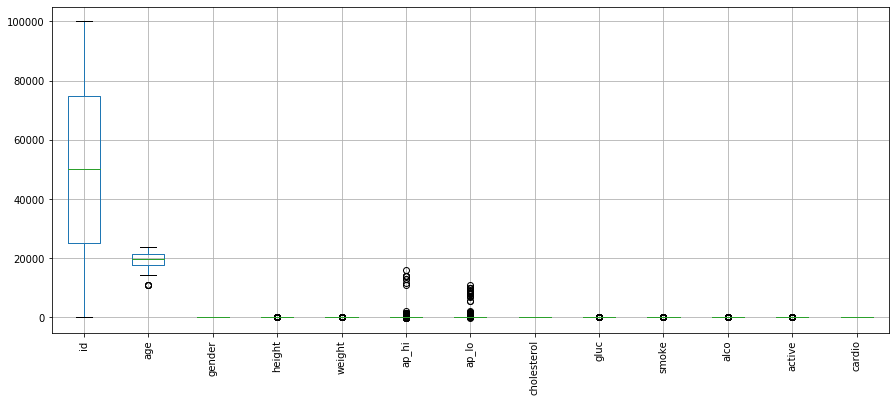

In [5]:
boxplot = data.boxplot(figsize=(15,6), rot=90)

Модель Random Forest при обучении дает такой метод как feature importance, используя его, можно оценить, какой параметр **максимально** влияет на болезнь.

In [14]:
#Почистим от выбросов
low = .05
high = .95
quant_df = data.quantile([low, high])
filt_df = data.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)

In [15]:
len(filt_df)

69996

In [16]:
output_y = data.iloc[:,-1]
input_x = data.iloc[:,:-1]
from sklearn.model_selection import train_test_split
X_train_22, X_test_22, y_train_22, y_test_22 = train_test_split(input_x, output_y, test_size=0.3)
# создаем модель деревья решений
# выбираем 100 деревьев в качестве параметра
# при желании можно изучить и поперебирать другие гиперпараметры 
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
model=RandomForestClassifier(n_estimators=100)

# обучаем модель
model.fit(X_train_22,y_train_22)

RandomForestClassifier()

No handles with labels found to put in legend.


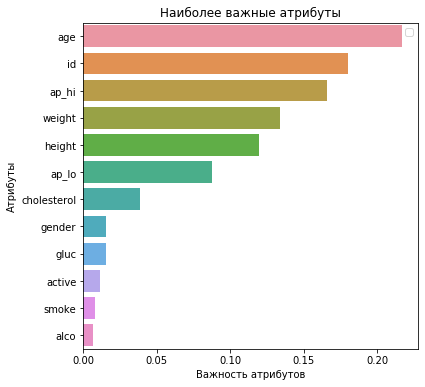

In [18]:
headers = list(X_train_22.columns.values)
feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()

* Сделать вывод о том, какой атрибут оказывает значительное влияение на наличие или отсутствие болезни.

In [ ]:
#самый максимальный по влиянию атрибут: возраст

Основная задача: определить, что влияет на сердечную болезнь больше всего. Например, выдвигая гипотезу о том, что тот кто курит, болеет чаще, мы сравниваем курящих пациентов с некурящими, и определяя насколько статистически значимы выборки, делаем вывод, что одна выборка статистически отличима от другой (или неотличима).
    Выдвигаем гипотезу на самый важный атрибут, полученный из feature_importance (Random_Forest). И оцениваем гипотезу. И делаем вывод.

In [22]:
df_no = data[data['smoke']==1]
df_yes = data[data['smoke']==0]            

In [25]:
print(f'Количество курящих {len(df_no)}')
print(f'Количество некурящих {len(df_yes)}')

Количество курящих 6169
Количество некурящих 63831


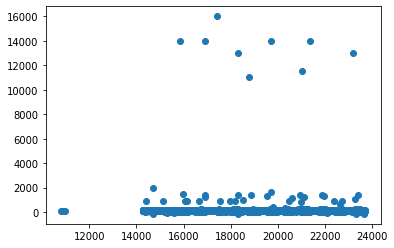

In [39]:
plt.scatter(data.age, data.ap_hi)
plt.show()

In [28]:
#H0 - нет зависимости между весом и употреблением алкоголя
stats.ttest_ind(data.alco, data.weight)

Ttest_indResult(statistic=-1362.647762975185, pvalue=0.0)

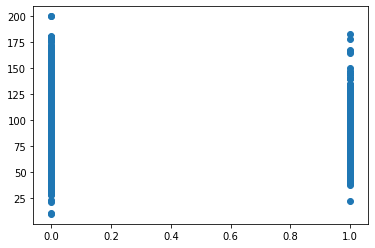

In [29]:
#p-value<0.05, значит отвергаем нулевую гипотезу. Есть взаимосвязь между весом и употреблением алкоголя
plt.scatter(data.alco,data.weight)
plt.show()

In [31]:
#сравним давление людей курящих и некурящих
df_no = data[data['smoke']==1]['ap_hi']
df_yes = data[data['smoke']==0]['ap_hi']           

print(stats.ttest_ind(df_no, df_yes))

Ttest_indResult(statistic=-0.24394145890090263, pvalue=0.8072768742643271)


p-value равно 0.8, что намного больше стандартной альфа ошибки 0.05, 
поэтому мы принимаем нулевую гипотезу и можем сказать, что не имеется статистического различия между давлением курящих и некурящих людей.

In [ ]:
#сравним давление людей курящих и некурящих
df_no = data[data['smoke']==1]['ap_hi']
df_yes = data[data['smoke']==0]['ap_hi']           

print(stats.ttest_ind(df_no, df_yes))

In [40]:
#Ho
df_no = data[data['smoke']==1]['cardio']
df_yes = data[data['smoke']==0]['cardio']           

print(stats.ttest_ind(df_no, df_yes))

Ttest_indResult(statistic=-4.097626290112295, pvalue=4.1787798766011306e-05)
